In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.append('../')
from src.models import evaluate_model, DataSplitDict
from src.preprocessing import set_types_encoded

# Load and preprocess data
original_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/original_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv'),
    X_test=set_types_encoded(pd.read_csv('../data/processed/original_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv')
)

pca_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv'),
    X_test=set_types_encoded(pd.read_csv('../data/processed/PCA/pca_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv')
)

mrmr_data = DataSplitDict(
    X_train=set_types_encoded(pd.read_csv('../data/processed/mRMR/mrmr_X_train.csv')),
    y_train=pd.read_csv('../data/processed/original_y_train.csv'),
    X_test=set_types_encoded(pd.read_csv('../data/processed/mRMR/mrmr_X_test.csv')),
    y_test=pd.read_csv('../data/processed/original_y_test.csv')
)

# Standardize features
original_data['X_train'] = original_data['X_train'].apply(pd.to_numeric, errors='coerce')
original_data['X_test'] = original_data['X_test'].apply(pd.to_numeric, errors='coerce')


## Supervised Learning

/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


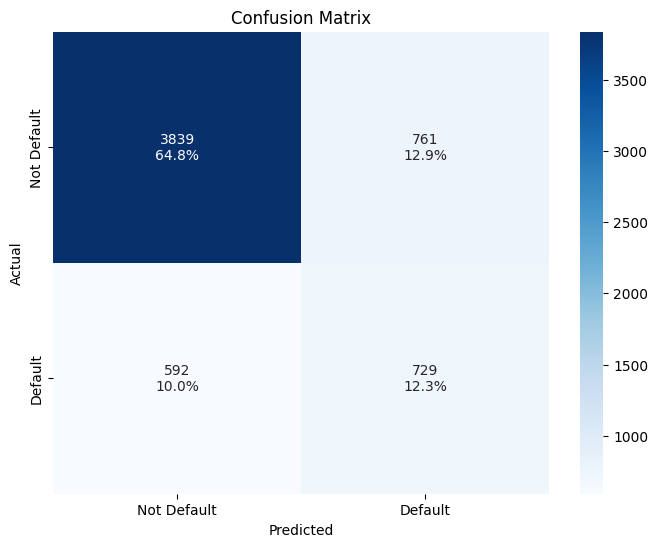

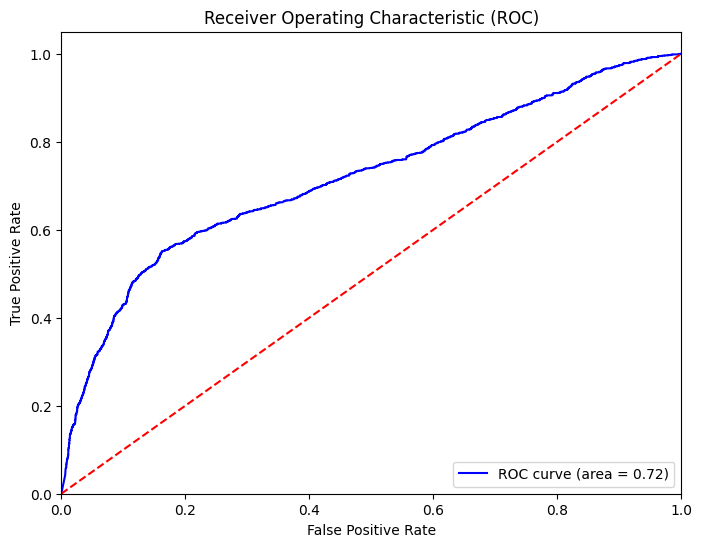

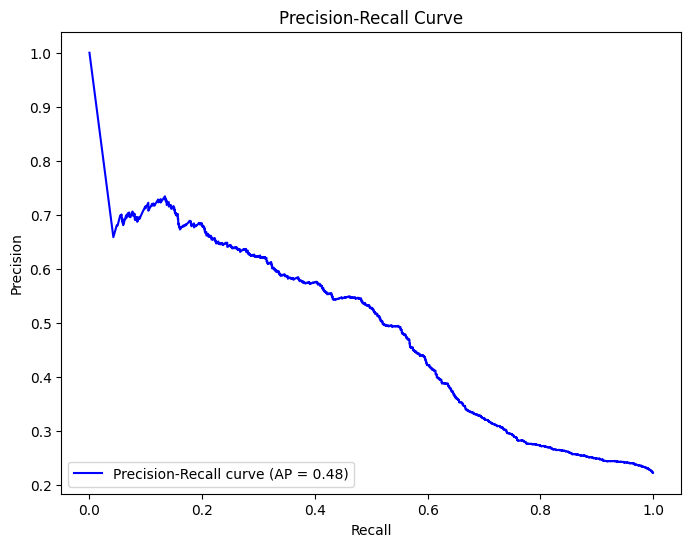

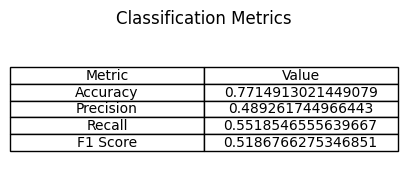

Results for Naive Bayes Classifier on mRMR Data:


In [19]:
from src.models import NaiveBayesClassifier

results = NaiveBayesClassifier(mrmr_data, plotsQ=True, save_path='../plots/models/NaiveBayes/mRMR')
print("Results for Naive Bayes Classifier on mRMR Data:")

/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

Best n_neighbors: 27
Best cross-validated accuracy: 0.8173141891891891


/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


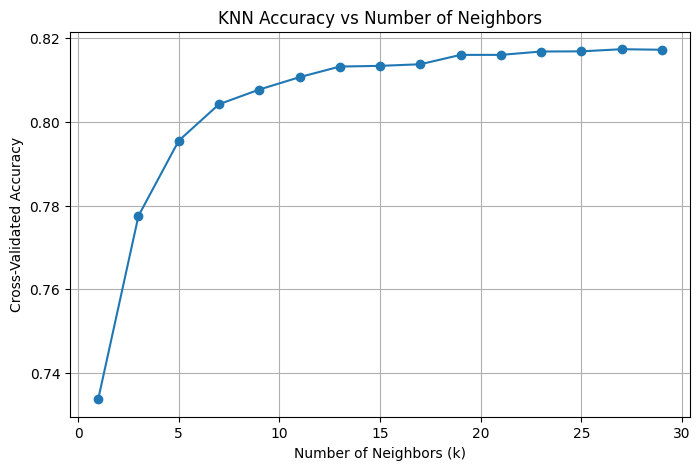

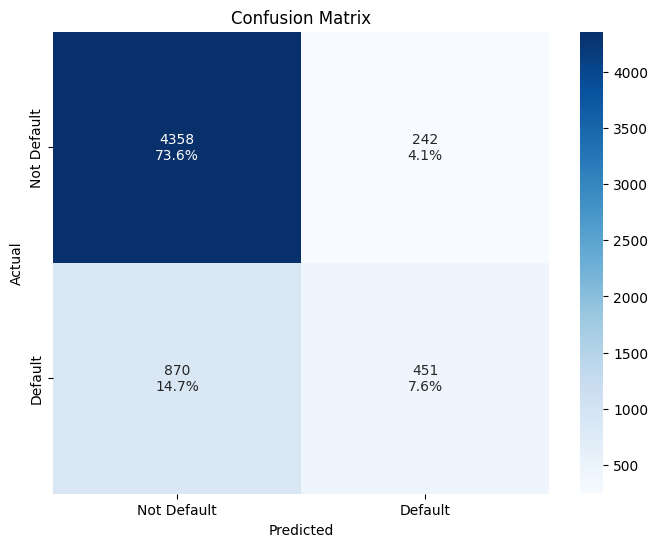

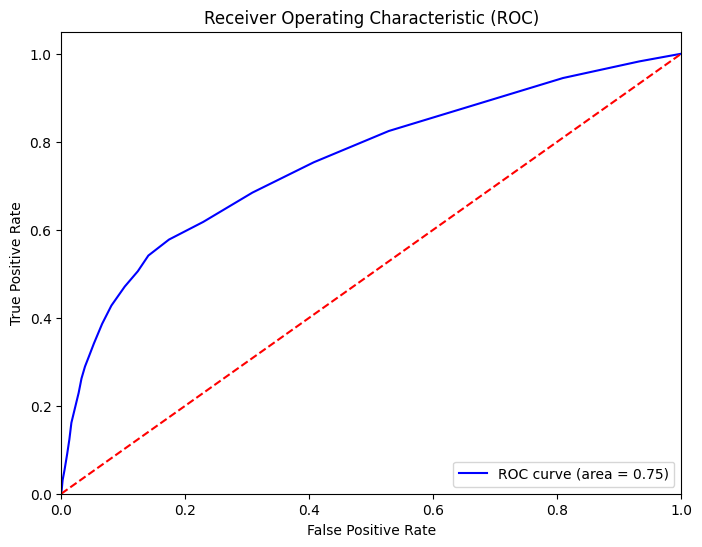

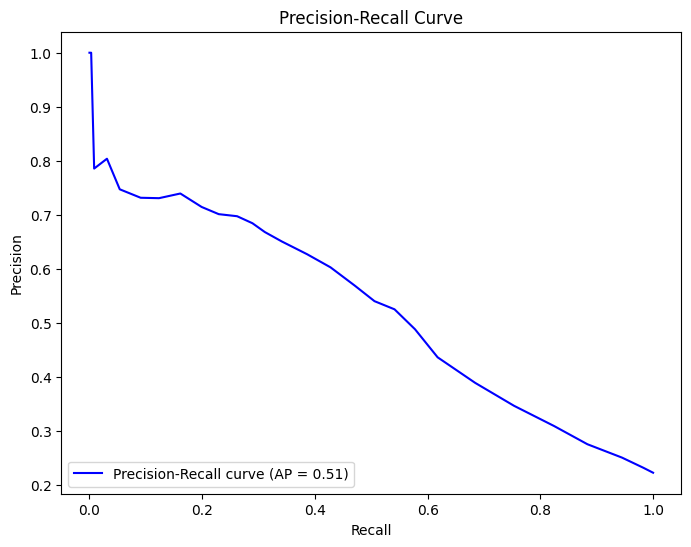

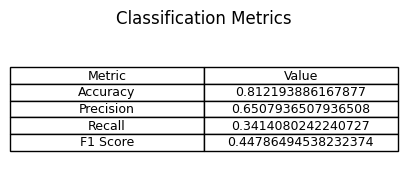

KNN results: (KNeighborsClassifier(n_neighbors=27), {'confusion_matrix': array([[4358,  242],
       [ 870,  451]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.83      0.95      0.89      4600\n           1       0.65      0.34      0.45      1321\n\n    accuracy                           0.81      5921\n   macro avg       0.74      0.64      0.67      5921\nweighted avg       0.79      0.81      0.79      5921\n', 'actual_default_rate': default payment next month    0.223104
dtype: float64, 'predicted_default_rate': np.float64(0.11704104036480324), 'roc_curve': {'fpr': array([0.00000000e+00, 0.00000000e+00, 6.52173913e-04, 2.17391304e-03,
       5.21739130e-03, 9.56521739e-03, 1.30434783e-02, 1.63043478e-02,
       2.28260870e-02, 2.80434783e-02, 3.26086957e-02, 3.82608696e-02,
       4.43478261e-02, 5.26086957e-02, 6.58695652e-02, 8.08695652e-02,
       1.02391304e-01, 1.23478261e-01, 1.40434783e-01, 1.73695652e-01,
       

In [20]:
# Apply K-Nearest Neighbors (KNN) for credit card default prediction

from src.models import KNNClassifier

results = KNNClassifier( mrmr_data, test_cases_n=list(range(1, 30, 2)), plotsQ=True, save_path='../plots/models/KNN/mRMR/')
print("KNN results:", results)

## Decision Trees

### Original data

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.8211148648648647


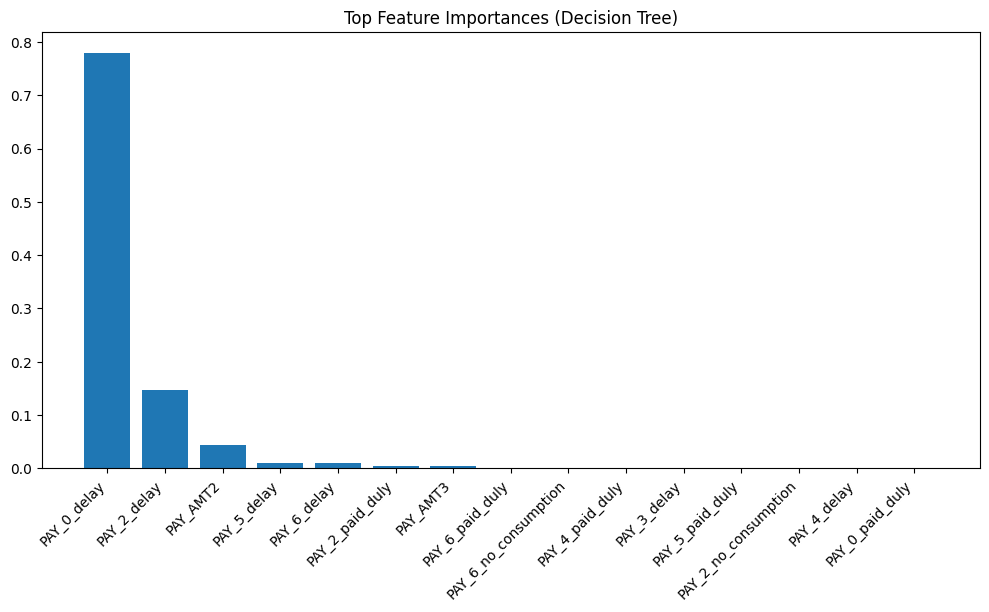

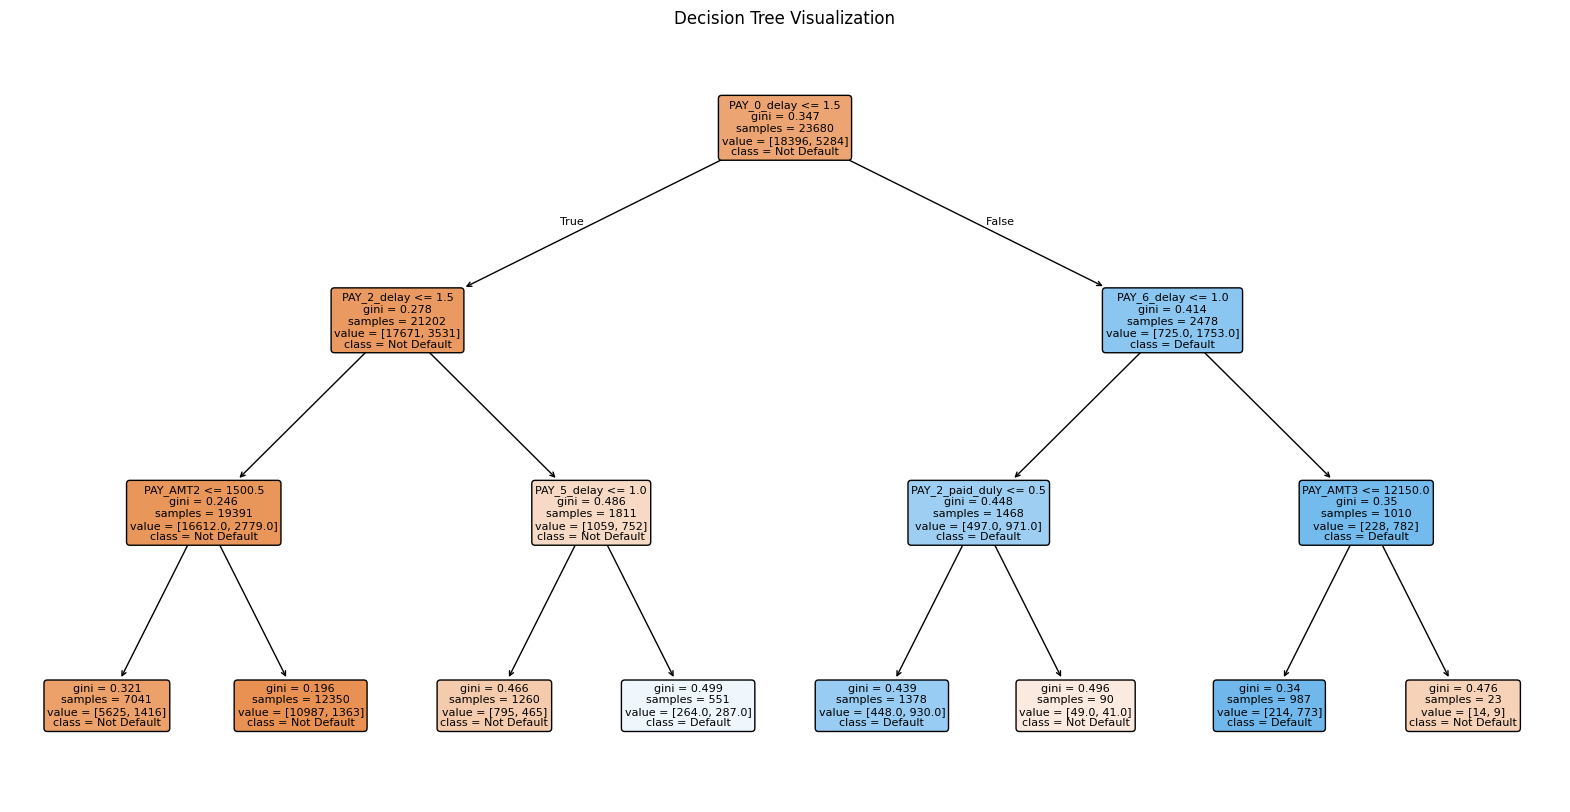

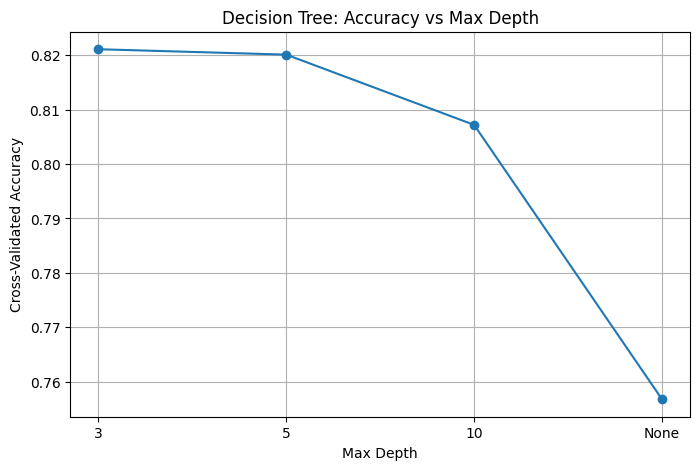

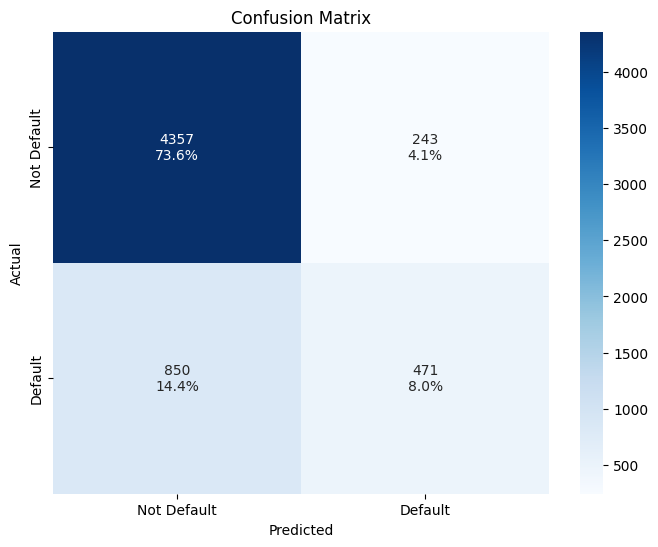

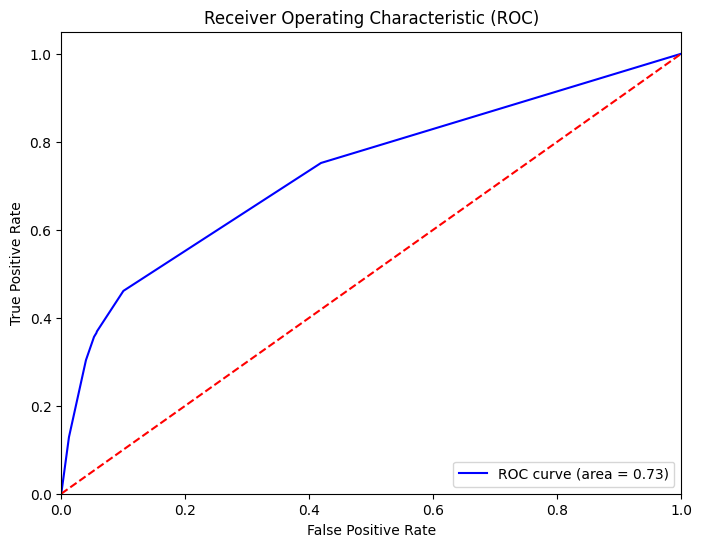

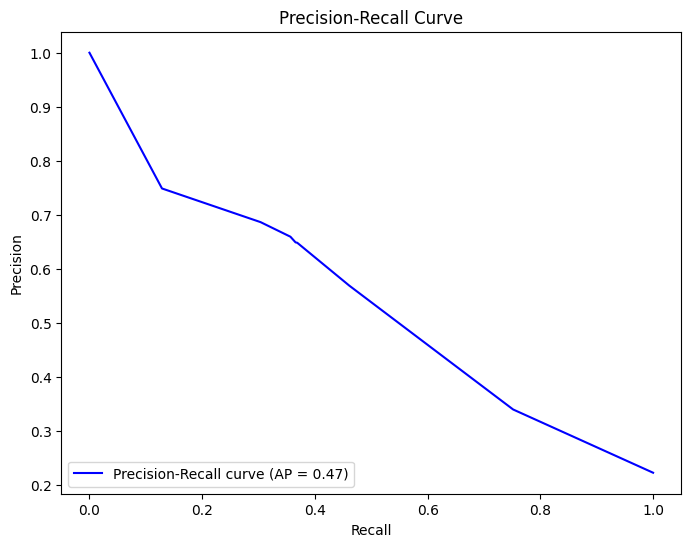

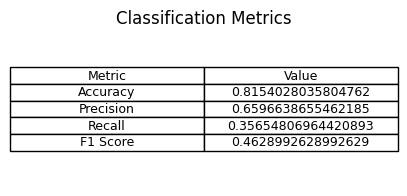

(DecisionTreeClassifier(max_depth=3, random_state=12345),
 {'confusion_matrix': array([[4357,  243],
         [ 850,  471]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      4600\n           1       0.66      0.36      0.46      1321\n\n    accuracy                           0.82      5921\n   macro avg       0.75      0.65      0.68      5921\nweighted avg       0.80      0.82      0.79      5921\n',
  'actual_default_rate': default payment next month    0.223104
  dtype: float64,
  'predicted_default_rate': np.float64(0.12058773855767607),
  'roc_curve': {'fpr': array([0.        , 0.0123913 , 0.03978261, 0.05282609, 0.05673913,
          0.0573913 , 0.10021739, 0.41891304, 1.        ]),
   'tpr': array([0.        , 0.12869039, 0.30355791, 0.35654807, 0.3656321 ,
          0.36866011, 0.46101438, 0.75170326, 1.        ]),
   'thresholds': array([       inf, 0.78318136, 0.67489115, 0.52087114, 0.45555

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from src.models import DecisionTreeClassifierModel

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10]
}

DecisionTreeClassifierModel(mrmr_data, param_grid=param_grid, save_path='../plots/models/DecisionTree/mRMR/', plotsQ=True)
